In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter

from urllib.request import urlopen
import tarfile
import requests
from zipfile import ZipFile
from io import BytesIO
import json


import xml.etree.ElementTree as et
import os
import re

import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import adjusted_rand_score, recall_score, precision_score
from sklearn.metrics import plot_confusion_matrix, f1_score, classification_report
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold

from gensim.models import Word2Vec, KeyedVectors

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

**Labels for the two dataset**

In [ ]:
# Possible values for the labels varies from 0 to 6, each one identify one of the 7 level of disagreement indicated by Paul Graham.

# Ordered label for the dataset from the dabate forum (create_debate) (0-1570 entries (1571 total)).
# Of 1571 value 1000 are not "None".

y_forum=[None,0,4,None,0,3,4,2,0,0,6,None,3,1,None,4,5,0,1,4,3,4,4,None,3,6,3,5,3,4,3,5,2,None,4,2,3,3,None,4,4,3,4,3,3,4,3,None,2,2,0,2,4,4,4,5,4,4,3,3,3,4,5,5,4,6,3,None,2,3,None,None,2,4,3,6,3,4,None,None,None,None,5,None,None,0,4,6,2,3,6,5,2,2,4,None,5,0,6,3,2,0,None,None,5,3,4,3,0,3,3,3,4,3,4,3,None,2,None,3,3,None,None,6,0,0,4,1,None,None,0,4,3,4,5,3,3,5,3,5,5,5,5,5,3,4,5,3,4,2,4,3,5,4,5,6,4,4,5,4,4,4,4,4,2,4,None,4,4,2,2,4,4,3,2,2,None,None,3,6,4,0,5,None,0,4,0,4,4,4,5,2,4,4,4,4,None,6,4,4,3,4,4,3,4,4,4,4,4,4,4,4,3,4,4,4,4,4,6,4,3,4,3,4,3,4,2,3,2,3,5,3,5,4,5,5,2,5,6,3,6,4,4,2,4,None,None,None,6,None,None,3,3,2,2,3,3,2,None,None,None,None,2,None,0,6,2,0,0,3,5,3,4,4,2,4,3,3,5,4,3,3,2,4,0,0,None,None,4,None,4,5,None,3,4,4,4,2,3,0,3,4,6,4,2,4,3,3,4,3,4,3,3,3,5,5,5,3,3,4,4,4,6,4,4,1,3,3,4,2,None,None,4,4,None,4,2,0,0,3,None,2,5,4,4,None,None,None,3,4,6,0,4,6,3,4,3,6,4,6,5,4,4,4,4,3,4,4,4,5,4,None,None,None,5,4,3,None,4,4,4,None,5,4,None,None,None,3,0,3,4,4,4,4,None,None,4,0,3,4,0,None,4,4,4,2,None,3,3,5,3,3,1,2,2,4,4,3,3,3,None,3,3,4,4,4,3,5,None,6,3,4,4,4,3,2,3,3,3,3,6,3,4,3,4,4,3,3,4,0,5,6,None,4,None,3,3,None,4,3,3,3,None,4,4,4,4,3,2,4,3,3,4,5,4,4,None,4,5,None,None,None,None,None,None,None,None,None,None,None,3,None,3,None,4,5,3,3,2,4,4,6,4,2,4,5,2,4,4,4,6,2,4,5,6,None,2,2,0,0,5,2,3,4,5,3,4,4,4,5,5,6,5,2,4,5,4,5,4,3,None,None,5,2,4,None,3,3,None,2,4,3,3,3,4,4,3,4,None,2,3,4,5,4,4,2,2,4,5,5,3,3,5,4,None,4,None,None,None,4,0,None,None,0,2,None,6,None,4,None,2,4,4,4,4,4,None,4,4,4,4,4,4,3,None,4,4,3,2,0,None,None,3,3,None,4,None,3,3,4,4,2,4,None,0,4,2,5,6,None,3,4,4,4,6,5,3,0,4,4,6,3,4,3,3,3,5,3,3,5,3,4,0,4,2,0,None,2,2,2,None,3,3,3,2,4,1,4,4,None,6,3,0,6,3,3,3,3,3,4,3,4,3,2,3,4,None,4,2,None,6,2,0,0,3,None,0,4,4,4,2,4,0,3,None,0,2,6,4,4,0,None,None,None,None,None,None,None,4,4,4,None,None,0,None,4,3,4,None,None,3,None,None,2,3,4,4,None,None,None,4,0,3,3,6,None,4,3,0,3,2,None,4,4,4,4,3,0,3,4,4,4,4,3,4,4,4,6,4,4,4,3,4,None,None,None,4,None,None,None,None,None,None,None,None,None,None,None,None,2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,4,3,6,4,0,2,5,4,4,3,3,4,6,4,4,4,3,5,4,3,0,4,3,4,4,4,1,3,None,1,0,5,0,0,2,3,5,6,3,2,None,None,5,2,None,4,4,4,4,4,4,3,4,3,4,3,6,4,3,4,4,4,4,4,4,2,6,None,6,6,4,4,6,3,4,3,6,3,0,4,None,4,4,4,4,2,2,3,6,4,5,4,4,3,2,3,None,4,6,4,2,4,4,4,4,4,6,None,None,None,None,None,None,5,4,4,4,4,4,4,5,3,4,3,3,3,2,6,3,4,4,6,None,4,4,4,4,4,4,6,3,4,4,4,4,3,3,4,3,3,3,4,3,None,None,None,None,3,6,None,None,None,None,None,2,3,None,2,6,4,4,4,4,None,None,4,4,6,3,6,3,None,None,None,None,None,None,3,4,4,4,4,4,None,4,3,3,None,3,6,4,4,4,3,4,3,3,3,4,3,4,4,4,4,4,4,2,2,None,4,None,3,None,4,2,4,4,4,4,None,None,4,None,3,4,3,4,4,2,2,4,3,None,3,4,4,4,3,4,3,None,3,0,None,None,None,0,None,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,None,None,None,3,None,None,4,None,6,4,None,None,None,None,None,None,None,None,None,None,None,None,0,2,None,None,None,4,4,2,3,4,6,4,4,4,4,4,3,5,4,0,3,0,0,3,3,4,5,5,4,None,1,4,3,4,4,3,3,2,3,2,4,4,3,2,4,4,6,5,3,None,3,3,3,3,3,3,4,3,3,3,2,5,None,0,None,3,3,3,3,5,5,4,4,4,3,4,3,3,4,4,4,4,None,4,3,4,4,2,4,None,3,3,4,4,3,4,None,4,4,6,3,4,4,6,3,4,6,4,None,4,5,5,4,4,6,4,3,None,None,None,None,None,4,4,4,2,0,4,4,3,4,5,4,3,4,4,4,3,3,4,4,4,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,3,None,4,4,4,5,None,3,4,4,4,4,4,4,4,5]


# Ordered label for the dataset from chat (sashank) (0-210 entries (211 total)).
# Of 209 value 200 are not "None".

y_chat=[4,3,4,4,3,4,3,4,4,3,4,4,4,5,3,4,4,3,None,3,3,4,3,2,3,5,6,5,5,5,5,4,4,4,5,4,4,4,3,3,3,3,4,4,4,5,4,4,4,3,3,3,2,3,4,3,3,3,4,5,2,4,3,3,3,3,3,3,3,3,6,4,4,3,3,3,None,4,None,None,4,3,3,3,4,3,3,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4,None,4,3,4,3,4,4,4,2,4,4,4,4,3,4,None,4,4,3,4,4,None,4,3,4,2,3,4,6,3,4,3,3,None,4,4,4,4,4,3,5,4,3,4,4,4,4,4,4,4,4,4,3,4,None,3,3,3,3,3,6,5,4,None,4,3,4,4,3,3,4,4,3,6,6,3,4,4,4,3,4,4,4,4,4,3,4,4,4,4,4,4,4,4,3,4,3,4,3,3,4,4,3,4,3,4,None,4]

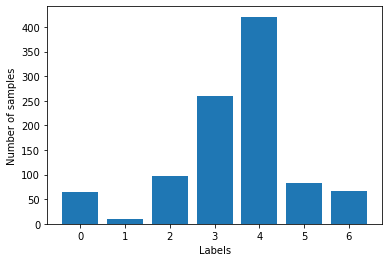

In [ ]:
# Count the number of occurence of each label in the forum dataset.
count_forum=Counter(y_forum)
for i in range(7):
  if i not in count_forum:
    count_forum[i]=0

labels = []
counts = []
for key,value in list(count_forum.items()):
  if key is not None:
    counts.append(value)
    labels.append(key)
plt.bar(labels, counts)
plt.xlabel("Labels")
plt.ylabel("Number of samples")
plt.show()

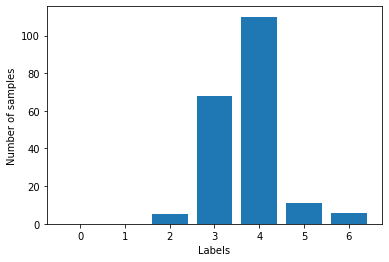

In [ ]:
# Count the number of occurence of each label in the chat dataset.
count_chat=Counter(y_chat)
for i in range(7):
  if i not in count_chat:
    count_chat[i]=0

labels = []
counts = []
for key,value in list(count_chat.items()):
    if key is not None:
      counts.append(value)
      labels.append(key)
plt.bar(labels, counts)
plt.xlabel("Labels")
plt.ylabel("Number of samples")
plt.show()

**Download of the two dataset**

In [ ]:
# Download and unzip the forum dataset (tgz file).

url_forum_dataset="http://www.cs.columbia.edu/~sara/download/create_debate.tgz"

forum_dataset_path = "debate_dataset"

unzipped = requests.get(url_forum_dataset, allow_redirects=True)

open('unzipped_dataset', 'wb').write(unzipped.content)

tar = tarfile.open('unzipped_dataset', "r:gz")
tar.extractall(path=forum_dataset_path)
tar.close()

In [ ]:
# Download and unzip the chat dataset (zip file).

url_sashank = 'https://github.com/sashank06/MPC-Corpus/raw/master/MPC%20CORPUS.zip'

sashank_path="sashank"

zipped_file = ZipFile(BytesIO(urlopen(url_sashank).read()))
zipped_file.extractall(path=sashank_path)

**Create two dictionaries containing *all* the messages of the two dataset** 

In [ ]:
# For the forum dataset:

# Create a dictionary document_messages_forum of all the message in the files contained in the folder.
# The dictionary contain another dictionary for each file in the folder.
# This inner dictionary contains another dictionary with two entries: one for the text of the 
# message (text), the other for the side of the message in the conversation (side).

folder_name="/content/debate_dataset/create_debate/training"

document_messages_forum={}

for file in os.listdir(folder_name):
  # Create the inner dictionary.
  document_messages_forum[file]={}

  try:
    xml_tree=et.parse(folder_name+"/"+file)
    xml_root=xml_tree.getroot()

    # Next line is strictly correlated to the structure of the XML files used.
    for node in xml_root.findall(".//item//comments//comment"):
      # Get the text of the message.
      message=node.find("text")
      # Get the id (url field) of the message.
      url=node.attrib.get("url")
      # Create most inner the dictionary.
      document_messages_forum[file][url]={"text":message.text,"side":node.attrib.get("side")}
  
  except:
    print(file+" not selected due to an invalid character contained in the file.")

debate.show.Does_history_have_value_outside_of_academics_lj.xml not selected due to an invalid character contained in the file.


In [ ]:
# For the chat dataset:

# Create a dictionary document_messages_chat of all the message in the files contained in the folder.
# The dictionary contain another dictionary for each file in the folder.
# This second dictionary associates the text of the message with its identifier (turn_no).

folder_name="/content/sashank/MPC CORPUS/chat_sessions_annotated"

document_messages_chat={}

for file in os.listdir(folder_name):
  document_messages_chat[file]={}
  xml_tree=et.parse(folder_name+"/"+file)
  xml_root=xml_tree.getroot()

  for node in xml_root:
    turn=node.attrib.get("turn_no")
    document_messages_chat[file][turn]=node.text

**Create a list of the messages to classify**

In [ ]:
# For the forum dataset:

# Create a list containing all the disagreement messages and the message they are responding to.
# Even positions will contain the messages, the following odd position the message they are referring to. 

folder_name="/content/debate_dataset/create_debate/training"

rows_forum=[]

for file in sorted(os.listdir(folder_name)):
  try:
    xml_tree=et.parse(folder_name+"/"+file)
    xml_root=xml_tree.getroot()

    for node in xml_root.findall(".//item//comments//comment"):
      # Link to the referring message (the one the response desagree with).
      link=node.attrib.get("parent-url")
      side=node.attrib.get("side")
      url=node.attrib.get("url")

      # Check that the message is a response to another message (parent-url different from -1), 
      # and that the response support a different opinion (side) with respect to the message it responds to.
      if (link!="-1" and side!=document_messages_forum[file][link]["side"]):
      
        # Get the text of the message.
        message=node.find("text")

        # Add the original message and the response in the list of disagreement response.
        rows_forum.append(message.text)
        rows_forum.append(document_messages_forum[file][link]["text"])

  except:
    print(file+" not selected due to an invalid character contained in the file.")

debate.show.Does_history_have_value_outside_of_academics_lj.xml not selected due to an invalid character contained in the file.


In [ ]:
# For the chat dataset:

# Create a list containing all the disagreement messages and the message they are responding to.
# Even positions will contain the messages, the following odd position the message they are referring to. 

# In the first step each messages is stored in a dictionary with the speaker and the message they are directed to.
# This dictionaries are stored in the list rows.

folder_name="/content/sashank/MPC CORPUS/chat_sessions_annotated"

rows=[]

for file in sorted(os.listdir(folder_name)):
  xml_tree=et.parse(folder_name+"/"+file)
  xml_root=xml_tree.getroot()

  first_line=True
  # A dictionary will contain, for each speaker, the last line written.
  last_line_speaked={}

  for node in xml_root:
    # Who has written the message.
    speaker=node.attrib.get("speaker")
    # Link to the referring message (the one the speaker desagree with).
    link=node.attrib.get("link_to")

    # Check that the line is not the first of the file, and that the line is a desagreement
    if ((node.attrib.get("dialog_act")=="TASK:--Disagree-Reject") and (not (first_line))):
      
      # Get the line of the message the disagreement refers (linked) to (format of link is name_user:line).
      # Not all the links to these messages contains the number of the line, some contains only the name of the speaker (refers to the last message witten by him/her).
      if (":" in link):
        _,line_message=link.split(":")
        line=document_messages_chat[file][line_message]
      else:
        line=last_line_speaked[speaker]

      rows.append({"opinion_expression":line,"response":node.text, "speaker":speaker,"file":file})  

    first_line=False
    # Last line witten by the speaker.
    last_line_speaked[speaker]=node.text



# Combine together the messages that are divide in differents chat lines.
# When modifiing a response store the old one to check if it match the next message opinion_expression.
rows_to_eliminate=[]
old_response=None

for i in range(0,len(rows)-1):
  if ((rows[i]["response"]==rows[i+1]["opinion_expression"] or old_response==rows[i+1]["opinion_expression"])and rows[i]["speaker"]==rows[i+1]["speaker"]):
    rows_to_eliminate.append(rows[i])
    rows[i+1]["opinion_expression"]=rows[i]["opinion_expression"]
    old_response=rows[i+1]["response"]
    rows[i+1]["response"]=rows[i]["response"]+" "+rows[i+1]["response"]

for row in rows_to_eliminate:
  rows.remove(row)

# Eliminate the repeating messages and responses.
rows_to_eliminate=[]

for i in range(0,len(rows)):
  for j in range((i+1),len(rows)):
    if (rows[i]["response"]==rows[j]["response"] and rows[i]["opinion_expression"]==rows[j]["opinion_expression"]):
      rows_to_eliminate.append(rows[j])

for row in rows_to_eliminate:
  rows.remove(row)



# Create the final list.
rows_chat=[]
for messages in rows:
  rows_chat.append(messages["response"])
  rows_chat.append(messages["opinion_expression"])

**Remove the not labeled document from the lists**

In [ ]:
corpus_forum=[]
corpus_chat=[]
res=[]

for i in range(len(y_forum)):
  if y_forum[i] is not None:
    corpus_forum.append(rows_forum[2*i])
    corpus_forum.append(rows_forum[2*i+1])
    res.append(y_forum[i])

y_forum=res    
res=[]

for i in range(len(y_chat)):
  if y_chat[i] is not None:
    corpus_chat.append(rows_chat[2*i])
    corpus_chat.append(rows_chat[2*i+1])
    res.append(y_chat[i])

y_chat=res      

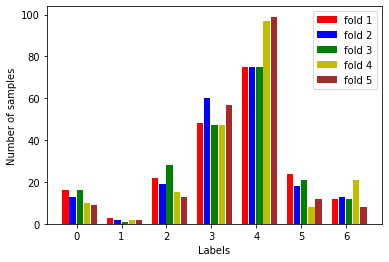

In [ ]:
# Count the number of occurence of each label in the chat dataset.
fold_y=[y_forum[0:200],y_forum[200:400],y_forum[400:600],y_forum[600:800],y_forum[800:1000]]
colour=['r','b','g','y','brown']
count_fold_y={}
count={}

for i in range(5):
  count_fold_y[i]=Counter(fold_y[i])
  for j in range(7):
    if j not in count_fold_y[i]:
      count_forum[i][j]=0

labels = {}
counts = {}
for i in range(5):
  counts[i]=[]
  labels[i]=[]
  for key,value in list(count_fold_y[i].items()):
    if key is not None:
      counts[i].append(value)
      labels[i].append((key+0.16*i)-0.25)    
  plt.bar(labels[i], counts[i], color = colour[i], width = 0.14)
plt.xlabel("Labels")
plt.legend(labels=['fold 1', 'fold 2','fold 3', 'fold 4','fold 5'])
plt.ylabel("Number of samples")
plt.show()

**Definition of the tokenizer**

In [ ]:
#  Lemmatization is used.
def build_tokenizer(text):

  wordnet_lemmatizer = WordNetLemmatizer()

  ignore_tokens = ['%s', '|', '\\', '~', '(', ')', '[', ']', '{', '}', '/', '"', "'", '^', '\n']

  # Remove the "<i>","</i>" (italics text style),"<b>","</b>" (bold text style) and link(<a _ > _ </a>) occurrences.
  # A "<b>_</b>" is sometimes used as quoting; Inner quotes are present as "<b> previous_qoting </b> last_quoting </b>".
  # The inner quotes are eliminated and only the words of the last quoted message are keeped.

  text=re.sub(r"<\/?i>","",text)
  text=re.sub(r"<\/?u>","",text)
  text=re.sub(r"<\/a>","",text)
  text=re.sub(r"<a href.*>","",text)

  while re.search(r"<b>.*<\/b>.*<\/b>",text) is not None:
    text=re.sub(r"<b>.*<\/b>","<b>",text)

  text=re.sub(r"<\/?b>","",text)  

  # Trasform to lowrcase.
  text=text.lower()

  # Text tokenization.

  tokens=nltk.word_tokenize(text)

  # Text normalization throgh lemmatizzation.

  lemmas=[]
  for word in tokens:
    if word not in ignore_tokens:
      lemmas.append(wordnet_lemmatizer.lemmatize(word))

  return lemmas  

**Datasets definition (only the forum dataset)**

**Bag of words Dataset**

In [ ]:
# Trasformation of the corpus in the vector space.
vectorizer=TfidfVectorizer(tokenizer=build_tokenizer)
bag_words_forum=vectorizer.fit_transform(corpus_forum)

bag_words_forum=bag_words_forum.toarray()


# The response_vector will contain the list of all the vector rapresentation of the response messages.
# The original_sentence_vector will contain the list of all the vector rapresentation of the messages the responses were directed to.
response_vector=[]
original_sentence_vector=[]

# Separate the vectros of the actual response messages and of the messages they respond to into two lists (1000 response messages).
for i in range(1000):
  response_vector.append(bag_words_forum[i*2])
  original_sentence_vector.append(bag_words_forum[i*2+1])

In [ ]:
# Dataset containing the vector rappresentation of all the labeled response messages in the forum dataset.
X_vector_forum_dataset=pd.DataFrame(response_vector)

X_vector_forum_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8225,8226,8227,8228,8229,8230,8231,8232,8233,8234,8235,8236,8237,8238,8239,8240,8241,8242,8243,8244,8245,8246,8247,8248,8249,8250,8251,8252,8253,8254,8255,8256,8257,8258,8259,8260,8261,8262,8263,8264
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.135610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.058596,0.325607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.310349,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.082292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.129140,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Words embedding Datasets**

In [ ]:
# Create the vocabulary for the embedding of the words (word2vec).
word2vec_sentences=[]
rows=rows_forum+rows_chat

for row in rows:
  word2vec_sentences.append(build_tokenizer(row))

word2vec_model = Word2Vec(word2vec_sentences, min_count=15)

In [ ]:
# Each disagreement message is rappresented as the medium point of the embedding of the words that compose it.
# The message the disagreement is referred to is used to copute the difference between the disareement response and this original message. 
def embed_corpus(corpus):
  documents_vector_rapresentation=[]

  for i in range(0, len(corpus)):
    vector_rapresentation=None
    sentence=build_tokenizer(corpus[i])
    counter=0

    # Compute the medium point of the vectors that compose the sentence
    for word in sentence:
      # Check if the word is present in the vocabulary.
      if word in word2vec_model.wv.vocab:
        counter=counter+1
        if vector_rapresentation is not None:
          vector_rapresentation=vector_rapresentation+word2vec_model.wv[word]
        else:
          vector_rapresentation=word2vec_model.wv[word]

    try:
      vector_rapresentation=np.divide(vector_rapresentation,counter) 
      if (i %2 == 0) :   
        documents_vector_rapresentation.append(vector_rapresentation)
      else:
        previous_vector=documents_vector_rapresentation[-1]
        documents_vector_rapresentation.append(vector_rapresentation-previous_vector)
    except:
      print("A string that dosen't contain any 'comon' word as been found in position {}: {}".format(str(i),sentence))

  return documents_vector_rapresentation      

In [ ]:
# The response_embedding will contain the list of all the embedding of the disagreement messages.
response_embedding=[]

# The original_and_response_sentence_embedding will contain the list of elements composed by both the embedding of the disagreement messages
# and the embedding of the messages they were directed to.
original_and_response_embedding=[]

# The combined_list will contain a list of element composed by the elements composed by the embedding of the disagreement messages,
# the embedding of the messages they were directed to, and the bag of words vector rappresentation of the disagreement messages.
combined_list=[]

documents_vector_rapresentation=embed_corpus(corpus_forum)

# Separate the embedding of the actual response messages and of the messages they respond to into two lists (1000 response messages).
for i in range(1000):
  response_embedding.append(documents_vector_rapresentation[i*2])
  next_vector=np.concatenate((documents_vector_rapresentation[i*2],documents_vector_rapresentation[i*2+1]),axis=None)
  original_and_response_embedding.append(next_vector)
  next_vector=np.concatenate((next_vector,bag_words_forum[i*2]),axis=None)
  combined_list.append(next_vector)

In [ ]:
# Three dataset will be created.

In [ ]:
# The first will contain only the embedding of the responses.
X_embedding_1_forum_dataset=pd.DataFrame(response_embedding)

X_embedding_1_forum_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.351841,0.350937,0.328896,0.188909,-0.705771,-0.108164,0.169885,0.651574,-0.232430,-0.057164,-0.312394,-0.081075,0.933955,0.850431,0.723808,0.961155,-0.370502,0.407380,-0.213364,-0.257225,1.045631,0.036601,-1.329234,0.147800,0.043450,-0.213277,0.171580,-0.036937,-0.014714,-0.256418,-0.444057,-0.288581,-0.016435,-0.016690,-0.651222,-0.105144,-0.123457,-0.719637,0.135821,-0.371884,...,-1.004551,0.563383,0.119081,-0.299941,0.266180,-0.046452,-0.744068,-0.014914,-0.445351,-0.544169,0.929951,-0.472000,0.116934,0.871178,-0.484978,1.245497,0.265839,-0.853972,-0.808234,0.058854,0.443155,1.081247,-0.170370,-0.235817,0.182592,0.243057,0.252452,-0.340271,-0.139402,-0.351121,-0.233478,0.977568,-0.104094,0.616367,0.682930,-0.061484,0.534927,-0.834121,-0.221069,-0.150381
1,0.690412,-0.050015,0.213738,0.477493,-0.355049,-0.184899,0.370410,0.576586,-0.028780,-0.266123,-0.594824,-0.065822,0.635375,0.495326,0.178782,0.609307,0.173820,0.369583,-0.523248,-0.345976,0.784168,0.135446,-0.725013,0.278725,-0.308128,-0.372479,0.841734,-0.183544,0.254608,0.161915,-0.415911,0.008910,-0.327533,0.181818,-0.478026,-0.349667,-0.299333,-0.614111,-0.161426,-0.290567,...,-0.079567,-0.026334,-0.013050,-0.097387,0.097073,0.260140,-0.994156,0.247306,-0.217401,-0.402763,0.854217,-0.283722,0.428157,0.726902,-0.375662,0.592772,-0.059458,-0.658963,0.206312,-0.087451,0.119125,0.583178,0.059920,-0.163893,0.178832,-0.241985,0.428290,-0.309635,-0.570607,-0.247399,-0.017832,0.446050,-0.138135,0.520635,0.621071,0.062469,0.084696,-0.711145,0.001425,-0.138732
2,0.878922,0.129748,0.209894,0.477275,-0.013467,-0.034873,0.166108,0.566422,-0.104887,-0.361374,-0.031518,-0.308725,0.359111,0.733559,0.259489,0.489453,-0.126814,0.459890,-0.236492,-0.534941,0.799984,0.049314,-0.792654,0.095532,-0.057992,-0.682315,0.595183,0.225203,0.173171,-0.041559,-0.148691,0.280422,-0.013118,-0.173365,-0.611526,-0.524104,-0.158826,-0.621647,-0.106134,0.120485,...,-0.656568,0.537230,-0.053392,-0.513315,-0.216077,-0.003642,-1.448524,-0.016003,-0.384621,-0.541307,1.137415,-0.050873,0.120627,0.724366,-0.067204,1.219086,0.090568,-0.815320,-0.030529,0.263737,0.302234,0.773223,0.283574,-0.217457,-0.276619,0.181044,0.085590,0.148161,-0.256815,-0.107639,-0.442596,0.426419,-0.612177,0.638236,0.832539,0.279702,0.458219,-0.783624,-0.406802,-0.646021
3,0.131087,0.040849,0.268820,0.166719,-0.283283,-0.121891,0.127263,0.330898,-0.481086,0.066487,0.104336,-0.175074,0.413281,0.214315,-0.010617,0.453170,-0.272459,-0.008220,-0.315176,-0.310746,0.443302,0.342528,-0.509311,-0.008418,0.281996,-0.222720,0.289475,0.332439,-0.293604,-0.229673,-0.386515,-0.083441,-0.006928,-0.153248,-0.069010,-0.035604,0.044117,-0.618610,0.143009,0.033791,...,-0.559106,0.343544,0.037354,0.210909,0.052895,0.540812,-1.039226,0.324640,-0.230784,-0.458668,0.864519,-0.330804,0.134833,0.251873,0.115973,0.559405,-0.046733,-0.409944,0.248319,-0.117079,0.029875,0.671931,-0.095137,-0.140844,0.151217,0.199436,0.426605,-0.169045,-0.224876,-0.091870,-0.103131,0.242713,0.245233,0.259683,0.429292,0.173730,0.008138,-0.433647,0.007498,-0.076818
4,0.318171,0.092903,0.258053,0.315763,-0.219837,-0.139032,-0.129200,0.058051,-0.499771,-0.247845,-0.376459,-0.043936,0.144335,0.422860,0.104366,0.659030,-0.370120,0.317236,-0.694991,-0.188938,0.647019,-0.002802,-0.584288,0.205208,-0.187555,-0.342430,0.259223,-0.074874,-0.243773,-0.343508,-0.179491,-0.065786,-0.401505,-0.172304,-0.293728,-0.116794,-0.456643,-0.667378,-0.184163,0.001631,...,-0.357497,0.229890,0.151352,-0.319823,-0.043061,0.312032,-1.122298,0.371870,-0.164523,-0.262540,0.985864,-0.038195,0.545672,0.194945,-0.079880,0.491040,-0.589932,-0.839804,-0.040601,-0.075923,0.076086,0.162593,-0.063084,0.366760,-0.073989,0.197160,0.675615,0.375638,-0.441188,-0.065113,0.010952,0.13407

In [ ]:
# The second one will contain both the embedding of the responses and of the messages they were directed to.
X_embedding_2_forum_dataset=pd.DataFrame(original_and_response_embedding)

X_embedding_2_forum_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,0.351841,0.350937,0.328896,0.188909,-0.705771,-0.108164,0.169885,0.651574,-0.232430,-0.057164,-0.312394,-0.081075,0.933955,0.850431,0.723808,0.961155,-0.370502,0.407380,-0.213364,-0.257225,1.045631,0.036601,-1.329234,0.147800,0.043450,-0.213277,0.171580,-0.036937,-0.014714,-0.256418,-0.444057,-0.288581,-0.016435,-0.016690,-0.651222,-0.105144,-0.123457,-0.719637,0.135821,-0.371884,...,-0.180577,-0.076559,0.329436,0.200916,-0.668115,0.326379,0.059194,0.236648,0.011461,0.085470,-0.035423,0.613259,-0.097791,0.194686,0.385597,-0.396243,-0.155190,0.113475,1.303838,-0.013605,-0.345676,-0.511204,-0.143413,0.124918,0.036609,-0.347161,-0.113807,0.444176,-0.055736,0.318379,0.441543,-0.378829,-0.369618,-0.009468,-0.027412,0.375281,-0.243132,0.190220,-0.183785,-0.099087
1,0.690412,-0.050015,0.213738,0.477493,-0.355049,-0.184899,0.370410,0.576586,-0.028780,-0.266123,-0.594824,-0.065822,0.635375,0.495326,0.178782,0.609307,0.173820,0.369583,-0.523248,-0.345976,0.784168,0.135446,-0.725013,0.278725,-0.308128,-0.372479,0.841734,-0.183544,0.254608,0.161915,-0.415911,0.008910,-0.327533,0.181818,-0.478026,-0.349667,-0.299333,-0.614111,-0.161426,-0.290567,...,-1.105561,0.513157,0.461567,-0.001638,-0.499008,0.019787,0.309282,-0.025571,-0.216489,-0.055935,0.040311,0.424981,-0.409014,0.338961,0.276281,0.256482,0.170107,-0.081534,0.289291,0.132700,-0.021646,-0.013135,-0.373703,0.052994,0.040370,0.137881,-0.289646,0.413540,0.375469,0.214657,0.225897,0.152689,-0.335577,0.086263,0.034447,0.251328,0.207100,0.067244,-0.406278,-0.110736
2,0.878922,0.129748,0.209894,0.477275,-0.013467,-0.034873,0.166108,0.566422,-0.104887,-0.361374,-0.031518,-0.308725,0.359111,0.733559,0.259489,0.489453,-0.126814,0.459890,-0.236492,-0.534941,0.799984,0.049314,-0.792654,0.095532,-0.057992,-0.682315,0.595183,0.225203,0.173171,-0.041559,-0.148691,0.280422,-0.013118,-0.173365,-0.611526,-0.524104,-0.158826,-0.621647,-0.106134,0.120485,...,-0.528560,-0.050407,0.501908,0.414291,-0.185858,0.283569,0.763650,0.237737,-0.049269,0.082608,-0.242887,0.192132,-0.101484,0.341497,-0.032177,-0.369832,0.020080,0.074823,0.526132,-0.218488,-0.204755,-0.203179,-0.597357,0.106558,0.495821,-0.285147,0.053054,-0.044256,0.061676,0.074897,0.650662,0.172320,0.138465,-0.031338,-0.177022,0.034096,-0.166424,0.139723,0.001948,0.396553
3,0.131087,0.040849,0.268820,0.166719,-0.283283,-0.121891,0.127263,0.330898,-0.481086,0.066487,0.104336,-0.175074,0.413281,0.214315,-0.010617,0.453170,-0.272459,-0.008220,-0.315176,-0.310746,0.443302,0.342528,-0.509311,-0.008418,0.281996,-0.222720,0.289475,0.332439,-0.293604,-0.229673,-0.386515,-0.083441,-0.006928,-0.153248,-0.069010,-0.035604,0.044117,-0.618610,0.143009,0.033791,...,-0.017763,0.002385,0.024758,-0.217229,0.089635,-0.446333,-0.221698,-0.200670,0.139280,0.143303,0.060085,0.094824,0.030719,-0.140576,-0.118547,-0.248959,-0.100608,-0.126300,-0.132032,0.040979,0.203699,-0.312565,0.154701,0.453629,0.117124,-0.032653,0.031953,0.187257,0.047782,0.017481,-0.000990,0.120420,-0.290606,0.382589,-0.098086,0.155773,-0.055415,0.033166,-0.244312,-0.261200
4,0.318171,0.092903,0.258053,0.315763,-0.219837,-0.139032,-0.129200,0.058051,-0.499771,-0.247845,-0.376459,-0.043936,0.144335,0.422860,0.104366,0.659030,-0.370120,0.317236,-0.694991,-0.188938,0.647019,-0.002802,-0.584288,0.205208,-0.187555,-0.342430,0.259223,-0.074874,-0.243773,-0.343508,-0.179491,-0.065786,-0.401505,-0.172304,-0.293728,-0.116794,-0.456643,-0.667378,-0.184163,0.001631,...,-0.201610,0.113654,-0.113997,0.530732,0.095956,0.228781,0.083072,-0.047230,-0.066261,-0.196128,-0.121345,-0.292609,-0.410839,0.056928,0.195852,0.068365,0.543199,0.429861,0.288920,-0.041156,-0.046212,0.509338,-0.032053,-0.507604,0.225206,0.002276,-0.249010,-0.544683,0.216

In [ ]:
# The third one will contain the embedding of the responses and of the messages they were directed to, and the bag of words rappresentation
# of the responses messages.

X_combined_forum_dataset=pd.DataFrame(combined_list)

X_combined_forum_dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8425,8426,8427,8428,8429,8430,8431,8432,8433,8434,8435,8436,8437,8438,8439,8440,8441,8442,8443,8444,8445,8446,8447,8448,8449,8450,8451,8452,8453,8454,8455,8456,8457,8458,8459,8460,8461,8462,8463,8464
0,0.351841,0.350937,0.328896,0.188909,-0.705771,-0.108164,0.169885,0.651574,-0.232430,-0.057164,-0.312394,-0.081075,0.933955,0.850431,0.723808,0.961155,-0.370502,0.407380,-0.213364,-0.257225,1.045631,0.036601,-1.329234,0.147800,0.043450,-0.213277,0.171580,-0.036937,-0.014714,-0.256418,-0.444057,-0.288581,-0.016435,-0.016690,-0.651222,-0.105144,-0.123457,-0.719637,0.135821,-0.371884,...,0.0,0.135610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.690412,-0.050015,0.213738,0.477493,-0.355049,-0.184899,0.370410,0.576586,-0.028780,-0.266123,-0.594824,-0.065822,0.635375,0.495326,0.178782,0.609307,0.173820,0.369583,-0.523248,-0.345976,0.784168,0.135446,-0.725013,0.278725,-0.308128,-0.372479,0.841734,-0.183544,0.254608,0.161915,-0.415911,0.008910,-0.327533,0.181818,-0.478026,-0.349667,-0.299333,-0.614111,-0.161426,-0.290567,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.878922,0.129748,0.209894,0.477275,-0.013467,-0.034873,0.166108,0.566422,-0.104887,-0.361374,-0.031518,-0.308725,0.359111,0.733559,0.259489,0.489453,-0.126814,0.459890,-0.236492,-0.534941,0.799984,0.049314,-0.792654,0.095532,-0.057992,-0.682315,0.595183,0.225203,0.173171,-0.041559,-0.148691,0.280422,-0.013118,-0.173365,-0.611526,-0.524104,-0.158826,-0.621647,-0.106134,0.120485,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.131087,0.040849,0.268820,0.166719,-0.283283,-0.121891,0.127263,0.330898,-0.481086,0.066487,0.104336,-0.175074,0.413281,0.214315,-0.010617,0.453170,-0.272459,-0.008220,-0.315176,-0.310746,0.443302,0.342528,-0.509311,-0.008418,0.281996,-0.222720,0.289475,0.332439,-0.293604,-0.229673,-0.386515,-0.083441,-0.006928,-0.153248,-0.069010,-0.035604,0.044117,-0.618610,0.143009,0.033791,...,0.0,0.082292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.318171,0.092903,0.258053,0.315763,-0.219837,-0.139032,-0.129200,0.058051,-0.499771,-0.247845,-0.376459,-0.043936,0.144335,0.422860,0.104366,0.659030,-0.370120,0.317236,-0.694991,-0.188938,0.647019,-0.002802,-0.584288,0.205208,-0.187555,-0.342430,0.259223,-0.074874,-0.243773,-0.343508,-0.179491,-0.065786,-0.401505,-0.172304,-0.293728,-0.116794,-0.456643,-0.667378,-0.184163,0.001631,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Models comparison**

In [ ]:
# Dictionary that associates a name to each of the 4 dataset types.
Datasets={'vector':X_vector_forum_dataset,'embedding_response':X_embedding_1_forum_dataset,'embedding_original':X_embedding_2_forum_dataset,'combined':X_combined_forum_dataset}

# Lists containing the names of the datasets and the models for supervised and unsupervised learning.
dataset_names=['vector','embedding_response','embedding_original','combined']
unsupervised_names=['kmeans','hierarchical']
supervised_names=['knn','tree','svm']

**Unsupervised learning**

In [ ]:
def def_unsupervised_models():
  models={
    'kmeans':KMeans(n_clusters=7, random_state=0),
    'hierarchical':AgglomerativeClustering(n_clusters=7)
  }

  return models

In [ ]:
# Create a list with 4 elements, one for each dataset type, where each element contais the predicted labels for
# both the 2 unsupervised models chosed.
unsupervised_models={}

for dataset in dataset_names:
  unsupervised_models[dataset]=def_unsupervised_models()

# Fit the models and predict the cluster of the instances for each one of the 4 dataset types.
for dataset in dataset_names:
  models=unsupervised_models[dataset]
  for name,model in models.items():
    print("Training: {}, dataset {}".format(name,dataset))
    X_train=Datasets[dataset]
    models[name]=model.fit_predict(X_train)

Training: kmeans, dataset vector
Training: hierarchical, dataset vector
Training: kmeans, dataset embedding_response
Training: hierarchical, dataset embedding_response
Training: kmeans, dataset embedding_original
Training: hierarchical, dataset embedding_original
Training: kmeans, dataset combined
Training: hierarchical, dataset combined


In [ ]:
# Memorize the rand scores in a dictionary named rand_scores.
rand_scores={}

# The dictionary will have an entry for each dataset type.
for dataset in dataset_names:
  rand_scores[dataset]={}

# Fit the models for each one of the 4 dataset types.
for dataset in dataset_names:
  models=unsupervised_models[dataset]
  scores=rand_scores[dataset]
  for name,model in models.items():
    scores[name]=adjusted_rand_score(y_forum,models[name])  

In [ ]:
print('{:<25} {:<25} {:<15}'.format('dataset' ,'model', 'rand score'))

for d_names,dataset_scores in rand_scores.items():
  for name, value in dataset_scores.items():
    print('{:<25} {:<25} {:<15}'.format(d_names ,name, round(value,2)))

dataset                   model                     rand score     
vector                    kmeans                    0.02           
vector                    hierarchical              -0.02          
embedding_response        kmeans                    0.03           
embedding_response        hierarchical              0.05           
embedding_original        kmeans                    0.03           
embedding_original        hierarchical              0.04           
combined                  kmeans                    0.03           
combined                  hierarchical              0.03           


**Supervised learning**

In [ ]:
def def_supervised_models():
  models={
    'knn':KNeighborsClassifier(n_neighbors=10),
    'tree':DecisionTreeClassifier(random_state=0),
    'svm':SVC()
  }

  return models

In [ ]:
# Do training dividing the dataset throgh 5 folds.

# Create a dictinary with 4 elements, one for each dataset type.
# Each element is a dictinary which contais 5 elements, one for each possible partition of the dataset.
# For each of this 5 possible partitions, 3 supervised models chosed are trained.
supervised_models={}

kf=KFold(n_splits=5, random_state=None, shuffle=False)

for dataset in dataset_names:
  supervised_models[dataset]={}
  for iteration in range(5):
    supervised_models[dataset][iteration]=def_supervised_models()

# Fit the models for each one of the 4 dataset types.
for dataset in dataset_names:
  dataset_iteration=Datasets[dataset]
  iteration_k_fold=0

  # Apply K-fold with 5 folds.
  for train_set,_ in kf.split(dataset_iteration,y_forum):
    models=supervised_models[dataset][iteration_k_fold]
    iteration_k_fold +=1

    # Select dataset rows for the iteration.
    X_train=dataset_iteration.loc[train_set]
    # Select labels for the iteration.
    y_train=[y_forum[j] for j in train_set]

    for name,model in models.items():
      print("Training: {}, dataset {}, iteration {}".format(name,dataset,str(iteration_k_fold)))
      models[name]=model.fit(X_train,y_train)

Training: knn, dataset vector, iteration 1
Training: tree, dataset vector, iteration 1
Training: svm, dataset vector, iteration 1
Training: knn, dataset vector, iteration 2
Training: tree, dataset vector, iteration 2
Training: svm, dataset vector, iteration 2
Training: knn, dataset vector, iteration 3
Training: tree, dataset vector, iteration 3
Training: svm, dataset vector, iteration 3
Training: knn, dataset vector, iteration 4
Training: tree, dataset vector, iteration 4
Training: svm, dataset vector, iteration 4
Training: knn, dataset vector, iteration 5
Training: tree, dataset vector, iteration 5
Training: svm, dataset vector, iteration 5
Training: knn, dataset embedding_response, iteration 1
Training: tree, dataset embedding_response, iteration 1
Training: svm, dataset embedding_response, iteration 1
Training: knn, dataset embedding_response, iteration 2
Training: tree, dataset embedding_response, iteration 2
Training: svm, dataset embedding_response, iteration 2
Training: knn, dat

In [ ]:
# Memorize the precision, recall and f1 scores in three dictionaries.
precision_scores={}
recall_scores={}
f1_scores={}

# The dictionary will have an entry for each dataset type.
for dataset in dataset_names:
  precision_scores[dataset]={}
  recall_scores[dataset]={}
  f1_scores[dataset]={}
  for model in supervised_names:
    precision_scores[dataset][model]=0.
    recall_scores[dataset][model]=0.
    f1_scores[dataset][model]=0.

# Find the predictions for each model of each one of the 4 dataset types.
for dataset in dataset_names:
  dataset_iteration=Datasets[dataset]
  scores_p=precision_scores[dataset]
  scores_r=recall_scores[dataset]
  scores_f=f1_scores[dataset]
  iteration_k_fold=0

  # Apply K-fold with 5 folds.
  for _,test_set in kf.split(dataset_iteration,y_forum):
    models=supervised_models[dataset][iteration_k_fold]
    iteration_k_fold +=1

    # Select dataset rows for the iteration.
    X_test=dataset_iteration.loc[test_set]
    # Select labels for the iteration.
    y_test=[y_forum[j] for j in test_set]

    for name,model in models.items():
      print("Predicting: {}, dataset {}, iteration {}".format(name,dataset,str(iteration_k_fold)))
      scores_p[name]=(precision_score(y_test,models[name].predict(X_test),average='weighted',zero_division=0)/5)+scores_p[name]
      scores_r[name]=(recall_score(y_test,models[name].predict(X_test),average='weighted',zero_division=0)/5)+scores_r[name]
      scores_f[name]=(f1_score(y_test,models[name].predict(X_test),average='weighted',zero_division=0)/5)+scores_f[name]

Predicting: knn, dataset vector, iteration 1
Predicting: tree, dataset vector, iteration 1
Predicting: svm, dataset vector, iteration 1
Predicting: knn, dataset vector, iteration 2
Predicting: tree, dataset vector, iteration 2
Predicting: svm, dataset vector, iteration 2
Predicting: knn, dataset vector, iteration 3
Predicting: tree, dataset vector, iteration 3
Predicting: svm, dataset vector, iteration 3
Predicting: knn, dataset vector, iteration 4
Predicting: tree, dataset vector, iteration 4
Predicting: svm, dataset vector, iteration 4
Predicting: knn, dataset vector, iteration 5
Predicting: tree, dataset vector, iteration 5
Predicting: svm, dataset vector, iteration 5
Predicting: knn, dataset embedding_response, iteration 1
Predicting: tree, dataset embedding_response, iteration 1
Predicting: svm, dataset embedding_response, iteration 1
Predicting: knn, dataset embedding_response, iteration 2
Predicting: tree, dataset embedding_response, iteration 2
Predicting: svm, dataset embeddin

In [ ]:
scores_names=['precision', 'recall', 'f1-score']
scores_dict=[precision_scores, recall_scores, f1_scores]

for i in range(3):
  print('\n{}:\n'.format(scores_names[i]))

  print('{:<25} {:<15} {:<15}'.format('dataset' ,'model', 'score'))

  for d_names,dataset_scores in scores_dict[i].items():
    for name, value in dataset_scores.items():
      print('{:<25} {:<15} {:<15}'.format(d_names ,name, round(value,2)))


precision:

dataset                   model           score          
vector                    knn             0.34           
vector                    tree            0.34           
vector                    svm             0.31           
embedding_response        knn             0.36           
embedding_response        tree            0.32           
embedding_response        svm             0.34           
embedding_original        knn             0.36           
embedding_original        tree            0.32           
embedding_original        svm             0.34           
combined                  knn             0.37           
combined                  tree            0.33           
combined                  svm             0.32           

recall:

dataset                   model           score          
vector                    knn             0.44           
vector                    tree            0.34           
vector                    svm             0.45   

**Final comparison, new model and new test set**

In [ ]:
# A new dataset composed by embedding of the disagreement messages and the messages they referred to is created
# for the chat dataset.

embedding_chat=[]
documents_vector_rapresentation=embed_corpus(corpus_chat)

# Lists of the couples of embedding (200 response messages).
for i in range(200):
  next_vector=np.concatenate((documents_vector_rapresentation[i*2],documents_vector_rapresentation[i*2+1]),axis=None)
  embedding_chat.append(next_vector)

X_embedding_chat=pd.DataFrame(embedding_chat)  

In [ ]:
# Separate the training and the test set for the forum dataset (800-200 rispectively).

# Train set.
X_train_forum=X_embedding_2_forum_dataset.loc[0:799]
y_train_forum=y_forum[0:800]

# Test set.
X_test_forum=X_embedding_2_forum_dataset.loc[800:999]
y_test_forum=y_forum[800:1000]

In [ ]:
# Build a single model that uses the support vector machine classifier.
smv_model=SVC().fit(X_train_forum,y_train_forum)

In [ ]:
# Report of the results of the test on the forum's texts.
print(classification_report(y_test_forum, smv_model.predict(X_test_forum),zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         2
           2       0.25      0.08      0.12        13
           3       0.38      0.37      0.37        57
           4       0.61      0.87      0.72        99
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         8

    accuracy                           0.54       200
   macro avg       0.18      0.19      0.17       200
weighted avg       0.43      0.54      0.47       200



In [ ]:
# Report of the results of the test on the chat's texts.
print(classification_report(y_chat, smv_model.predict(X_embedding_chat), labels=[0,1,2,3,4,5,6],zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         5
           3       0.40      0.94      0.56        68
           4       0.82      0.28      0.42       110
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         6

   micro avg       0.47      0.47      0.48       200
   macro avg       0.17      0.17      0.14       200
weighted avg       0.59      0.47      0.42       200



In [ ]:
# Compute the confusion matrices.

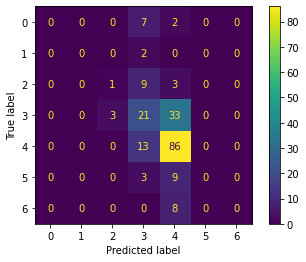

In [ ]:
# forum confusion matrix.
plot_confusion_matrix(smv_model, X_test_forum, y_test_forum)

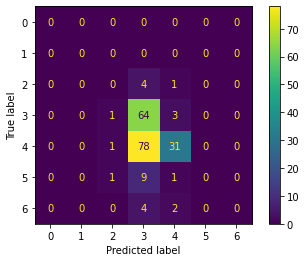

In [ ]:
# chat confusion matrix.
plot_confusion_matrix(smv_model, X_embedding_chat, y_chat, labels=[0,1,2,3,4,5,6])